## Problem 1 
a)Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)


   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


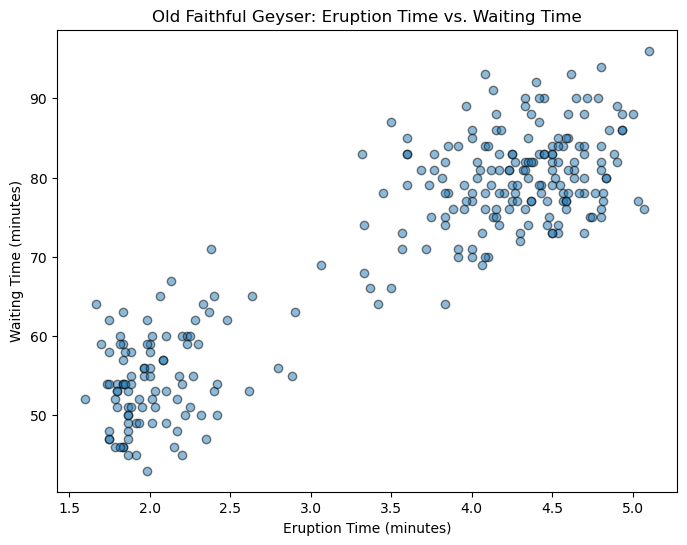

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('faithful.csv')

# Display the first few rows to understand the structure
print(data.head())

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['eruptions'], data['waiting'], alpha=0.5, edgecolor='k')
plt.title('Old Faithful Geyser: Eruption Time vs. Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.show()

B)How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters.

ans:- The plot shows two distinct clusters. The first cluster is concentrated around shorter eruption durations (approximately 1.5 to 3 minutes) paired with shorter waiting times (around 50 to 70 minutes). The second cluster centers on longer eruption durations (3.5 to 5 minutes) and correspondingly longer waiting times (about 70 to 90 minutes).


c)Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 
ans:- Hierarchical clustering organizes data into a layered structure of clusters using either of two approaches:

Agglomerative (Bottom-Up) Approach:
1)
Each data point starts as its own cluster2).
At each iteration, the algorithm merges the two closest clusters based on a distance metric (like Euclidean distance3)).
This merging process continues until all points are in a single cluster or a desired number of clusters is reac
hed.
Divisive (Top-Down) Approa1)ch:

Start with a single cluster containing all data p2)oints.
At each iteration, the algorithm splits the most dissimilar clusters until each data point is in its own cluster or until a desired number of clusters

Steps in an Agglomerative Hierarchical Clustering Algorithm:

*Calculate Pairwise Distances:
Determine the distance (e.g., Euclidean distance) between each pair of points.

*Initialize Clusters:
Start by treating each data point as a separate cluster.

*Merge the Closest Clusters:
Identify the two clusters that are closest based on a selected linkage criterion:
Single Linkage: Distance between the nearest points in the clusters.
Complete Linkage: Distance between the farthest points in the clusters.
Average Linkage: Average distance across all pairs of points between clusters.
Merge these two clusters

*Repeat:
Continue merging the closest clusters until reaching the desired number of clusters or combining all points into one cluster.

*Dendrogram:
A dendrogram, or tree diagram, can illustrate this process, depicting the merging levels of clusters. The vertical axis represents the distance or similarity level at which clusters were joined.

## Based on the scatter plot analysis:

Distinct Clusters: We can see two clear clusters, which hierarchical clustering could effectively capture.

Hierarchical Structure: If the objective were to investigate a nested arrangement of clusters or identify sub-groups within the main clusters, hierarchical clustering might be a useful approach. However, with only two main clusters, this method might be unnecessarily complex.

While hierarchical clustering is feasible for this dataset, it may not be the most efficient choice. Since our goal is to classify the data into two clusters, a simpler method like K-Means (which we’ll explore in Problem 2) could be more suitable. K-Means is less computationally demanding and is effective for straightforward clustering tasks. hieved.


## PROBLEM 2
a) Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('faithful.csv')

# Convert data to numpy array (ignore the first column if it contains instance IDs)
X = data[['eruptions', 'waiting']].values
# K-Means function
def kmeans(X, k, max_iters=100):
    # Randomly initialize centroids by selecting k random points from X
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    prev_centroids = centroids + 1  # ensure initial difference
    objective_values = []
    
    # Run the algorithm until convergence or max_iters
    for i in range(max_iters):
        # Step 1: Assign clusters
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Step 2: Update centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Calculate the objective function (sum of squared distances to centroids)
        objective = sum(np.min(distances, axis=0)**2)
        objective_values.append(objective)
        
        # Check for convergence (if centroids do not change)
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    
    return labels, centroids, objective_values

# Run K-Means with k=2 (based on Problem 1's conclusion)
k = 2
labels, centroids, objective_values = kmeans(X, k)

b) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)

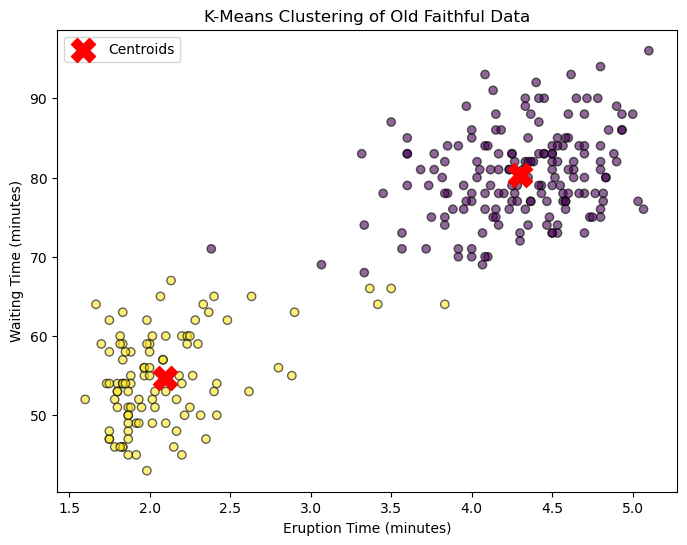

In [14]:
# Scatter plot of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering of Old Faithful Data')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.show()

c)A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is  (10 points)


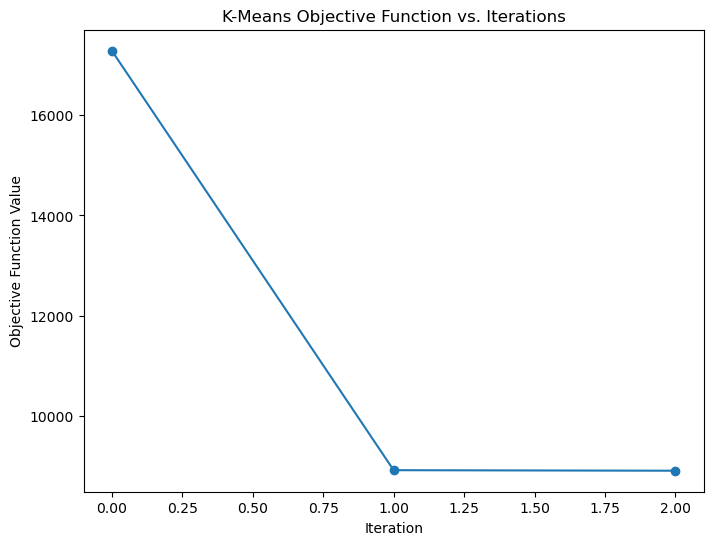

In [25]:
# Plot the objective function to observe convergence
plt.figure(figsize=(8, 6))
plt.plot(objective_values, marker='o')
plt.title('K-Means Objective Function vs. Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.show()

d)Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)
ans:- Yes, the K-Means algorithm effectively identified the two clusters, consistent with our visual analysis in Problem 1.
the clusters were correctly identified, further random initializations may not be necessary unless observe inconsistent results in different runs.
